Set directory (google drive example shown)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/your-folder-here')


Preprocessing of SAINT results file (Supplementary Table 3 - BirA* dataset - SAINT results 7013_cleaned_v2)

7013_cleaned_v2.txt in statistical source data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
# Ensure original SAINT results file is used, NOT excel workbook listed as Supplementary Table 3
df = pd.read_csv('7013_cleaned_v2.txt', sep='\t')

# Filter the DataFrame for BFDR values less than or equal to 0.01
filtered_df = df[df['BFDR'] <= 0.01]

# Count the number of preys associated with each bait
prey_count_per_bait = filtered_df.groupby('Bait')['PreyGene'].nunique()


#High-confidence preys per bait (barplot)
Extended Data Fig. 2a

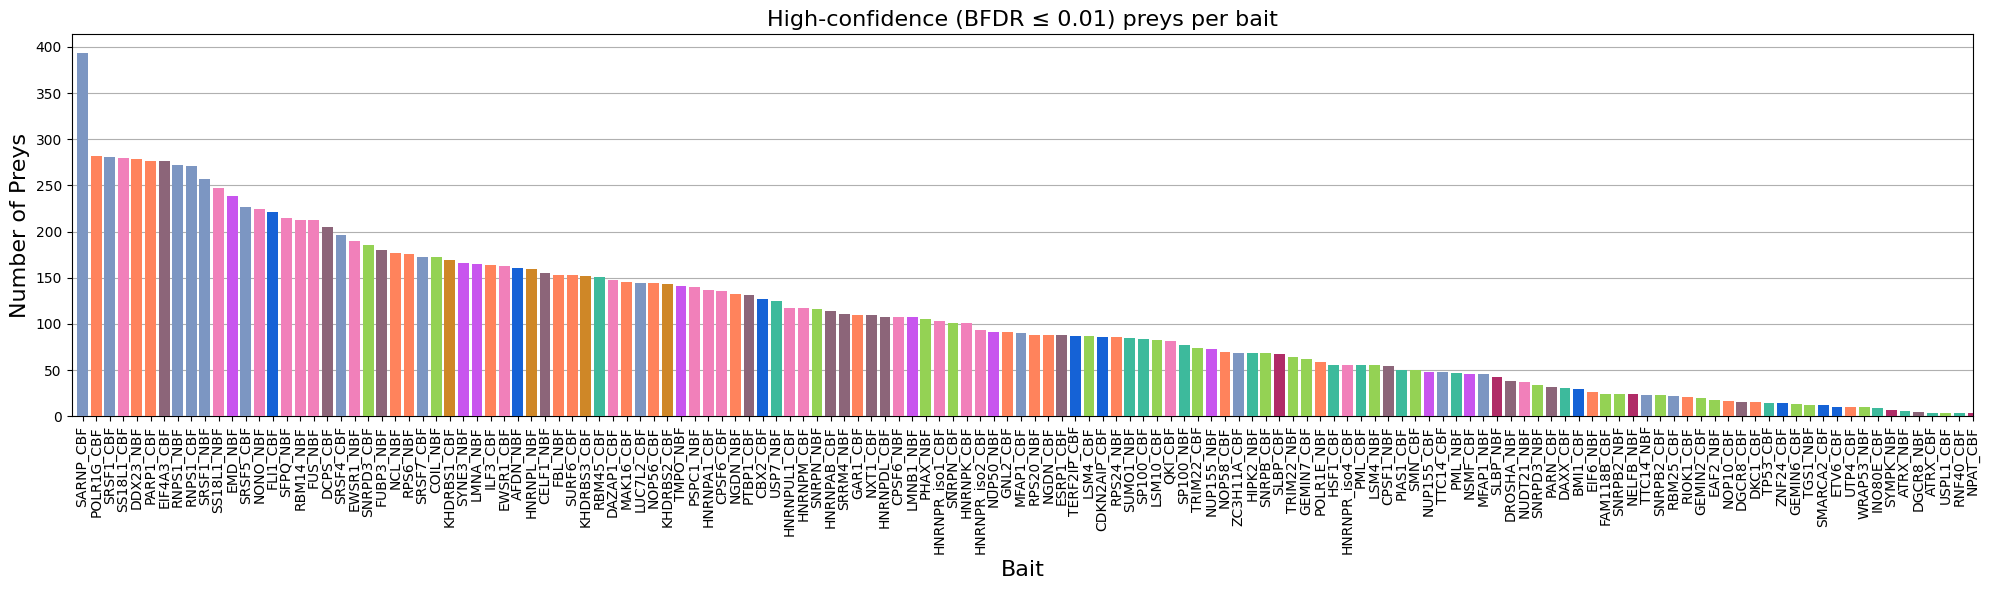

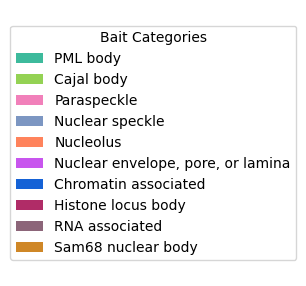

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Configure Matplotlib to not convert text to paths in SVG output
plt.rcParams['svg.fonttype'] = 'none'

# Load the CSV data into a DataFrame
df = pd.read_csv('7013_cleaned_v2.txt', sep='\t')

# Load the color coding CSV file
color_df = pd.read_csv('Bait classification colors violin v2.csv')  # Replace with the actual path to your CSV

# Define the color mapping for the strings to hex codes
color_key = {
    'PML body': '#3DBA9C',
    'Cajal body': '#94D254',
    'Paraspeckle': '#F180BA',
    'Nuclear speckle': '#7C96C2',
    'Nucleolus': '#FF835C',
    'Nuclear envelope, pore, or lamina': '#C855EE',
    'Chromatin associated': '#1562D6',
    'Histone locus body': '#B02C67',
    'RNA associated': '#8C6579',
    'Sam68 nuclear body': '#CF8727'
}

# Read the color coding CSV file
# Make sure to use the correct path for your CSV file
#color_df = pd.read_csv('Bait classification colors violin v2.csv')  # Replace with the actual path to your CSV

# Create a mapping from the bait name to the color code string
bait_to_color_string = {row[0]: row[1] for _, row in color_df.iterrows()}  # Assumes the color code string is in the third column

# Now map the bait name to the actual hex color using the 'color_key' dictionary
bait_to_color_hex = {bait: color_key[color_string] for bait, color_string in bait_to_color_string.items() if color_string in color_key}

# Filter the DataFrame for BFDR values less than or equal to 0.01
filtered_df = df[df['BFDR'] <= 0.01]

# Count the number of preys associated with each bait
prey_count_per_bait = filtered_df.groupby('Bait')['PreyGene'].nunique()

# Sort the baits by the number of preys
sorted_prey_counts = prey_count_per_bait.sort_values(ascending=False)

# Create a bar plot with color coding
plt.figure(figsize=(20, 6))

colors = []
for bait in sorted_prey_counts.index:
    bait_prefix = bait.split('_')[0]  # Extract the prefix of the bait name
    colors.append(bait_to_color_hex.get(bait_prefix, '#808080'))

bars = plt.bar(sorted_prey_counts.index, sorted_prey_counts.values, color=colors, width=0.8, zorder=3)

plt.xlim(bars[0].get_x() - bars[0].get_width()/2, bars[-1].get_x() + bars[-1].get_width()/2)
plt.xlabel('Bait', fontsize=16)
plt.ylabel('Number of Preys', fontsize=16)
plt.title('High-confidence (BFDR ≤ 0.01) preys per bait', fontsize=16)
plt.xticks(rotation=90)
plt.grid(axis='y', zorder=0)

plt.tight_layout()
plt.savefig('barplot.svg')
plt.show()
#plt.close()

# Create legend separately
legend_handles = [Patch(facecolor=color, label=label) for label, color in color_key.items()]
# Include the "Other" category
#legend_handles.append(Patch(facecolor='#808080', label='Other'))

# Create a dummy figure for the legend
fig_legend = plt.figure(figsize=(3, 3))
ax_legend = fig_legend.add_subplot(111)
# Add all the legend handles
ax_legend.legend(handles=legend_handles, title='Bait Categories', loc='center')
ax_legend.axis('off')

plt.tight_layout()
fig_legend.savefig('barplot-legend.svg', format='svg', bbox_inches='tight')
plt.show()
#plt.close(fig_legend)



#High-confidence preys per bait category (violin plot)
Fig. 1d

<ipython-input-47-1978dedb7223>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='Category', y='PreyGene', data=prey_count, palette=color_key, cut=0)
<ipython-input-47-1978dedb7223>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(wrapped_labels, rotation=0, ha='center', fontsize=5, va='top')


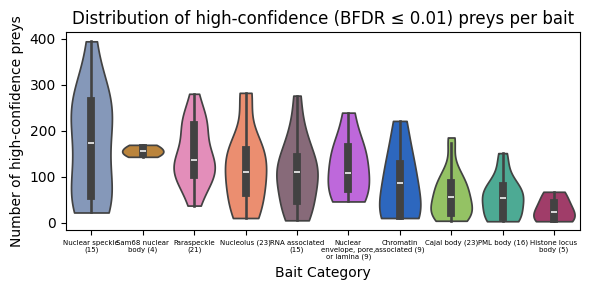

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Configure Matplotlib to not convert text to paths in SVG output
plt.rcParams['svg.fonttype'] = 'none'

#function for x axis labels later on
def wrap_labels(labels, width=20):
    """ Wrap labels to a specified width. """
    from textwrap import wrap
    return ['\n'.join(wrap(label, width=width)) for label in labels]


# Load the main experimental data
df = pd.read_csv('7013_cleaned_v2.txt', sep='\t')

# Load the bait classification data
bait_classification_df = pd.read_csv('Bait classification colors violin v2.csv')

# Create a mapping for baits that accounts for both "_CBF" and "_NBF" suffixes
bait_to_category = {row['Bait'] + suffix: row['Category'] for _, row in bait_classification_df.iterrows() for suffix in ['_CBF', '_NBF', '_iso1_CBF', '_iso2_CBF', '_iso4_CBF']}
df['Category'] = df['Bait'].map(bait_to_category)

# Filter data by BFDR threshold
df_significant = df[df['BFDR'] <= 0.01]

# Count unique preys for each bait and category
prey_count = df_significant.groupby(['Bait', 'Category'])['PreyGene'].nunique().reset_index()

# Define colors for categories, adding a palette for unspecified
color_key = {
    'PML body': '#3DBA9C',
    'Cajal body': '#94D254',
    'Paraspeckle': '#F180BA',
    'Nuclear speckle': '#7C96C2',
    'Nucleolus': '#FF835C',
    'Nuclear envelope, pore, or lamina': '#C855EE',
    'Chromatin associated': '#1562D6',
    'Histone locus body': '#B02C67',
    'RNA associated': '#8C6579',
    'Sam68 nuclear body': '#CF8727'
}

# Update colors dynamically for unspecified categories
all_categories = prey_count['Category'].unique()
palette = sns.color_palette("Pastel2", len(all_categories))
color_key.update({cat: color_key.get(cat, color) for cat, color in zip(all_categories, palette) if cat not in color_key})

# Calculate medians and sort categories by median
category_medians = prey_count.groupby('Category')['PreyGene'].median().sort_values(ascending=False)
prey_count['Category'] = pd.Categorical(prey_count['Category'], categories=category_medians.index, ordered=True)

# Count the number of baits per category
bait_counts = prey_count['Category'].value_counts()

# Create violin plot
plt.figure(figsize=(6, 3))
ax = sns.violinplot(x='Category', y='PreyGene', data=prey_count, palette=color_key, cut=0)

# Modify x-axis labels to include the count of baits
#ax.set_xticklabels([f'{label} ({bait_counts[label]})' for label in category_medians.index])
#ax.set_xticklabels([f'{label} ({bait_counts[label]})' for label in category_medians.index],
#                   rotation=0, ha='center', fontsize=8)

# Wrap labels and set them with specific properties
wrapped_labels = wrap_labels([f'{label} ({bait_counts[label]})' for label in category_medians.index], width=15)
ax.set_xticklabels(wrapped_labels, rotation=0, ha='center', fontsize=5, va='top')


# Add labels and title
plt.xlabel('Bait Category')
plt.ylabel('Number of high-confidence preys')
plt.title('Distribution of high-confidence (BFDR ≤ 0.01) preys per bait')

# Create legend with descriptions
#legend_patches = [mpatches.Patch(color=color, label=label) for label, color in color_key.items()]
#legend_description = [
#    mpatches.Patch(color='none', label='Median: horizontal line inside violin'),
#    mpatches.Patch(color='none', label='Quartiles: thicker part of violin'),
#    mpatches.Patch(color='none', label='Spread: width of violin'),
#]

#plt.legend(handles=legend_patches + legend_description, title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and save the plot as SVG
#plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('violinplot.svg')
plt.show()


#Replicate correlation scatterplots
Fig. 1c and Extended Data Fig. 1b

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# Load the dataset
file_path = 'list_tmp_6099_final.txt'  # Update this with the path to your TSV file
df = pd.read_csv(file_path, sep='\t')

# Create the directory for plots if it doesn't exist
output_dir = 'replicate_corr_plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Process each bait individually
for bait in df['Bait'].unique():
    subset = df[df['Bait'] == bait]

    # Split 'Spec' into two columns for A and B
    subset[['rep_1', 'rep_2']] = subset['Spec'].str.split('|', expand=True).astype(float)
    # Calculate R and R^2 before BFDR cutoff
    R = subset[['rep_1', 'rep_2']].corr().iloc[0, 1]  # Pearson correlation coefficient
    R_squared = R**2  # Coefficient of determination


    # Scatter plot before BFDR cutoff
    plt.figure()
    plt.scatter(subset['rep_1'], subset['rep_2'], alpha=0.5, s=3)
    plt.title(f'{bait} Replicate Correlation\nR={R:.2f}, R^2={R_squared:.2f}')
    plt.xlabel('Replicate 1')
    plt.ylabel('Replicate 2')
    plt.savefig(f'{output_dir}/{bait}_rep_corr.png')
    plt.close()

    # Apply BFDR cutoff of 0.01 and plot
    subset_filtered = subset[subset['BFDR'] <= 0.01]
     # Calculate R and R^2 after BFDR cutoff
    if not subset_filtered.empty:
        R_filtered = subset_filtered[['rep_1', 'rep_2']].corr().iloc[0, 1]
        R_squared_filtered = R_filtered**2
        plot_title = f'{bait} Replicate Correlation (BFDR <= 0.01)\nR={R_filtered:.2f}, R^2={R_squared_filtered:.2f}'
    else:
        plot_title = f'{bait} Replicate Correlation (BFDR <= 0.01)\nNo Data Below Cutoff'

    plt.figure()
    plt.scatter(subset_filtered['rep_1'], subset_filtered['rep_1'], alpha=0.5, color='red', s=3)
    plt.title(plot_title)
    plt.xlabel('Replicate 1')
    plt.ylabel('Replicate 2')
    plt.savefig(f'{output_dir}/{bait}_rep_corr_bfdr0.01.png')
    plt.close()




# Load the dataset
file_path = 'list_tmp_6099_final.txt'
df = pd.read_csv(file_path, sep='\t')

# Split 'Spec' into two columns for A and B
df[['rep_1', 'rep_2']] = df['Spec'].str.split('|', expand=True).astype(float)

# Calculate R and R^2 for the entire dataset
R = df[['rep_1', 'rep_2']].corr().iloc[0, 1]  # Pearson correlation coefficient
R_squared = R**2  # Coefficient of determination

# Plot for the entire dataset before BFDR cutoff
plt.figure()
plt.scatter(df['rep_1'], df['rep_2'], alpha=0.5)
plt.title(f'Overall Replicate Correlation\nR={R:.2f}, R^2={R_squared:.2f}')
plt.xlabel('Replicate 1')
plt.ylabel('Replicate 2')
plt.savefig('overall_rep_corr.svg', dpi=300)
plt.close()

# Apply BFDR cutoff of 0.01
df_filtered = df[df['BFDR'] <= 0.01]

# Calculate R and R^2 after BFDR cutoff
if not df_filtered.empty:
    R_filtered = df_filtered[['rep_1', 'rep_2']].corr().iloc[0, 1]
    R_squared_filtered = R_filtered**2
    plot_title = f'Overall Replicate Correlation (BFDR <= 0.01)\nR={R_filtered:.2f}, R^2={R_squared_filtered:.2f}'
else:
    plot_title = 'Overall Replicate Correlation (BFDR <= 0.01)\nNo Data Below Cutoff'

plt.figure()
plt.scatter(df_filtered['rep_1'], df_filtered['rep_2'], alpha=0.5, color='red')
plt.title(plot_title)
plt.xlabel('Replicate 1')
plt.ylabel('Replicate 2')
plt.savefig('overall_rep_corr_bfdr0.01.svg', dpi=300)
plt.close()



# Load the dataset
file_path = '7013_cleaned_v2.txt'  # Replace with your actual file path
df = pd.read_csv(file_path, sep='\t')


df['Base_Gene'] = df['Bait'].str[:-4]

has_both_variants = df.groupby('Base_Gene').filter(lambda x: {'_CBF', '_NBF'}.issubset(x['Bait'].str[-4:].unique()))

print(len(np.unique(has_both_variants['Bait'])))
# Log2 transform AvgSpec values
has_both_variants['Log2_AvgSpec'] = np.log2(has_both_variants['AvgSpec'])

# Separate the transformed data into NBF and CBF for plotting
nbf_data = has_both_variants[has_both_variants['Bait'].str.endswith('_NBF')]['Log2_AvgSpec']
cbf_data = has_both_variants[has_both_variants['Bait'].str.endswith('_CBF')]['Log2_AvgSpec']

# Prepare data for plotting
data_for_plotting = pd.DataFrame({'NBF': nbf_data, 'CBF': cbf_data})

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_for_plotting, palette="Set3")
plt.title('Log2 Transformed Boxplot of AvgSpec for NBF vs CBF Baits')
plt.ylabel('Log2(AvgSpec)')
plt.savefig('N_C_baits_boxplot.png')





df = pd.read_csv(file_path, sep='\t')

df['Base_Gene'] = df['Bait'].str[:-4]
# df = df[df['BFDR'] <= 0.01]

has_both_variants = df.groupby('Base_Gene').filter(lambda x: {'_CBF', '_NBF'}.issubset(x['Bait'].str[-4:].unique()))

# Separate and aggregate AvgSpec values by NBF and CBF, if needed
nbf_data = has_both_variants[has_both_variants['Bait'].str.endswith('_NBF')].groupby('Base_Gene')['AvgSpec'].mean()
cbf_data = has_both_variants[has_both_variants['Bait'].str.endswith('_CBF')].groupby('Base_Gene')['AvgSpec'].mean()

# Merge the NBF and CBF data
merged_data = pd.merge(nbf_data, cbf_data, left_index=True, right_index=True, suffixes=('_NBF', '_CBF'))

# Calculate R and R^2
R = merged_data.corr().iloc[0, 1]
R_squared = R**2
plot_title = f'Overall Replicate Correlation\nR={R:.2f}, R^2={R_squared:.2f}'

# Scatter plot
plt.figure()
plt.scatter(merged_data['AvgSpec_NBF'], merged_data['AvgSpec_CBF'], alpha=0.5)
plt.title(plot_title)
plt.xlabel('NBF AvgSpec')
plt.ylabel('CBF AvgSpec')
plt.savefig('N_vs_C_terminally_tagged_baits_correlation.png', dpi=300)
plt.show()
plt.close()

#Processing of saint results for cytoscape bait-prey network
Related to Extended Data Figs. 3 and 4

In [ ]:
import numpy as np
import pandas as pd
import requests

# Read the input data
# I have manually removed all rows that are not BFDR ≤ 0.01, but have not changed bait names yet
# this file is available in the statistical source materials and in the github repo
df = pd.read_csv('7013_cleaned_v2_preprocessed_cytoscape.txt', sep='\t')

# Modify 'Bait' column to retain only the gene name before the underscore
df['Bait'] = df['Bait'].apply(lambda x: x.split('_')[0])  # Added line to modify Bait names

# Identify numeric columns for averaging
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Define aggregation functions for duplicate handling
agg_functions = {col: 'mean' if col in numeric_cols else 'first' for col in df.columns}

# Find rows with duplicate 'Bait' and 'PreyGene'
duplicates = df.duplicated(subset=['Bait', 'PreyGene'], keep=False)

# Aggregate duplicate rows
aggregated_df = df[duplicates].groupby(['Bait', 'PreyGene'], as_index=False).agg(agg_functions)

# Keep unique rows
unique_df = df[~duplicates]

# Combine aggregated and unique rows
final_df = pd.concat([aggregated_df, unique_df], ignore_index=True)

# Function to get protein length from UniProt
def get_uniprot_protein_length(uniprot_id):
    url = f"https://www.uniprot.org/uniprot/{uniprot_id}.fasta"
    response = requests.get(url)
    if response.status_code == 200:
        fasta_data = response.text
        protein_sequence = "".join(fasta_data.split("\n")[1:])
        return len(protein_sequence)
    else:
        return None

# Check if a dictionary of UniProt IDs and their lengths exists
# If not, fetch protein lengths and store them in the dictionary
if 'unique_lengths' not in globals():
    unique_ids = final_df['UniProtID'].unique()
    unique_lengths = {uid: get_uniprot_protein_length(uid) for uid in unique_ids}

# Create a DataFrame from the unique_lengths dictionary
lengths_df = pd.DataFrame(list(unique_lengths.items()), columns=['UniProtID', 'PreyLength'])

# Merge the lengths DataFrame with the final_df DataFrame
merged_df = final_df.merge(lengths_df, on='UniProtID')

# Calculate NormalizedSpecSum
merged_df['NormalizedSpecSum'] = merged_df['SpecSum'] / merged_df['PreyLength']


### OPTION 1: ALL BAIT-PREY ASSOCIATIONS

# Instead of filtering for the top N and then saving, save the entire DataFrame
merged_df.to_csv('7013_complete_cytoscape_processed_data.csv', index=False)

#Calculating control-subtracted length-adjusted spectral counts (NormSpec)
This generates the input file needed for cytoscape (used to generate Extended Data Figs. 3 and 4)

In [ ]:
# Based on Go et al 2021 there is a different way to calculate NormSpec
# in this version the median length of preys for bait i is divided by the length of prey j, instead of the other way around
# this is then multiplied by ((avgspec for prey j) - (avgspec of top 10 controls))

from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/ACG Lab/Dyakov et al 2023 (google drive version)/v2_dataset/cytoscape bait-prey')

import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('7013_complete_cytoscape_processed_data.csv')

# Function to compute the average of top 10 control counts
def compute_top10avgctrl(ctrl_counts):
    try:
        counts = list(map(int, ctrl_counts.split('|')))
        return np.mean(sorted(counts, reverse=True)[:10])
    except:
        return 0  # Return 0 if there's any error in processing

# Apply the function to calculate 'top10avgctrl'
df['top10avgctrl'] = df['ctrlCounts'].apply(compute_top10avgctrl)

# Calculate median PreyLength for each 'Bait'
df['median_prey_length'] = df.groupby('Bait')['PreyLength'].transform('median')

# Function to calculate NormSpec
def calculate_normspec(row):
    spec_diff = row['AvgSpec'] - row['top10avgctrl']
    norm_spec = spec_diff * (row['median_prey_length'] / row['PreyLength'])
    return norm_spec

# Apply NormSpec calculation
df['NormSpec'] = df.apply(calculate_normspec, axis=1)

# Calculate the rank of 'NormSpec' within each 'Bait' group
df['NormSpecRank'] = df.groupby('Bait')['NormSpec'].rank(method='dense', ascending=False)

# Now the DataFrame 'df' includes a 'NormSpecRank' column that indicates the rank of each row within its 'Bait' group based on 'NormSpec'

# Write to a new CSV file
#df.to_csv('7013_complete_cytoscape_processed_with_normspec_CellMapMethod.csv', index=False)

###################################################################
## SECTION TO PRINT ONLY TOP N PREYS PER BAIT, BASED ON NORMSPEC ##
###################################################################

# Define the number of top entries you want per 'Bait'
top_n = 25  # Change this number based on your requirement

# Get the top N rows for each 'Bait' based on 'NormSpec'
top_n_df = df.groupby('Bait').apply(lambda x: x.nlargest(top_n, 'NormSpec')).reset_index(drop=True)

# Write the filtered data to a new CSV file
top_n_df.to_csv('7013_complete_cytoscape_processed_with_normspec_CellMapMethod_top25.csv', index=False)

Mounted at /content/drive


After processing, here is code to examine the distribution of NormSpec across the top 25 per bait, in the example used. This is to help identify cutoffs (default edge weight to consider) using the edge-weighted spring embedded layout algorithm in cytoscape.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from your CSV file
file_path = '7013_complete_cytoscape_processed_with_normspec_CellMapMethod_top25.csv'  # Modify this to the path of your CSV file
df = pd.read_csv(file_path)

# Check column names and adjust 'NormSpec' if necessary
print("Column names in the DataFrame:", df.columns)  # This will print all column names
normspec_column = 'NormSpec'  # Adjust this manually if the name differs

# Verify that 'NormSpec' is in DataFrame
if normspec_column in df.columns:
    # Plotting the histogram of 'NormSpec' values
    plt.figure(figsize=(18, 6))  # Increased width for better visibility
    bins = 100
    range_min, range_max = 0, 1000

    plt.hist(df[normspec_column], bins=bins, color='blue', alpha=0.7, range=(range_min, range_max))
    plt.title('Histogram of NormSpec Values')
    plt.xlabel('NormSpec')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Setting custom x-axis ticks to improve readability
    bin_width = (range_max - range_min) / bins
    ticks = np.arange(range_min, range_max + bin_width, bin_width)
    plt.xticks(ticks, rotation=90)  # Rotate labels to prevent overlap

    plt.show()
else:
    print(f"The column '{normspec_column}' does not exist in the DataFrame. Please check the column names provided above.")

# calculate mode (ignoring decimals)

from scipy import stats
import pandas as pd

# Load the data
file_path = '7013_complete_cytoscape_processed_with_normspec_CellMapMethod_top25.csv'  # Modify this to the path of your CSV file
df = pd.read_csv(file_path)

# Round 'NormSpec' values to the nearest integer
df['Rounded_NormSpec'] = df['NormSpec'].round().astype(int)

# Calculate the mode of the rounded 'NormSpec' values using pandas
mode_value = df['Rounded_NormSpec'].mode()

# Output the mode and its frequency
if not mode_value.empty:
    mode_val = mode_value[0]
    frequency = df['Rounded_NormSpec'].value_counts().loc[mode_val]
    print("The mode of NormSpec (rounded to nearest integer) is:", mode_val)
    print("Frequency of the mode:", frequency)
else:
    print("No mode found or empty DataFrame.")


The mode of NormSpec (rounded to nearest integer) is: 10
Frequency of the mode: 16
